## 1. Check Data quality

#### 1.1 Load data

In [1]:
import pandas as pd
import numpy as np

#Load data
df = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


In [2]:
df.replace(" ", np.nan, inplace=True)

#### 1.2 Drop useless column: Device

In [3]:
df = df.drop('Device', axis=1, errors='ignore')

#### 1.3 Drop missing values

In [4]:
# Calculate the sum of missing values for each column
missing_values = df.isnull().sum()
missing_values

Year                           0
Age                           25
GenderNum                     10
AutismQuotient                 6
STAI                           9
BRIEF_Total                    7
DailyAvgMins                 183
DailyAvePickups              417
VS_RT_correct_Conjunction      0
VS_RT_correct_Single           0
dtype: int64

In [5]:
df.dropna(inplace = True)
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333
8,2021,33,2,2,51,24,475,112,1278.250000,1263.913333
9,2021,27,1,3,32,4,155,97,650.187500,604.390000
12,2021,19,2,4,53,81,305,120,741.265000,662.885417
13,2021,20,2,2,36,47,210,105,970.483333,869.622500
...,...,...,...,...,...,...,...,...,...,...
471,2021,31,1,3,39,23,104,69,924.016667,889.833333
473,2022,41,2,1,40,41,415,123,1043.103333,848.630556
477,2022,30,2,3,46,55,215,154,851.308333,708.291667
482,2022,20,2,1,45,16,568,127,1014.891667,913.600000


#### 1.4 Convert specified datatype to numeric

In [6]:
df.dtypes

Year                           int64
Age                           object
GenderNum                     object
AutismQuotient                object
STAI                          object
BRIEF_Total                   object
DailyAvgMins                  object
DailyAvePickups               object
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object

In [7]:
# Convert necessary columns to int
float_columns = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce').astype(int)
df.dtypes

Year                           int64
Age                            int32
GenderNum                      int32
AutismQuotient                 int32
STAI                           int32
BRIEF_Total                    int32
DailyAvgMins                   int32
DailyAvePickups                int32
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object

#### 1.5 Handle duplicates

In [8]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

#### 1.6 Handle Outliers

In [9]:
df.describe()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2021.209677,29.677419,1.846774,2.943548,47.879032,52.685484,266.758065,104.782258,926.716796,839.098584
std,0.408730,7.794670,0.404132,1.749808,11.192762,24.584140,132.949368,41.302092,177.097578,170.766710
min,2021.000000,19.000000,1.000000,0.000000,20.000000,3.000000,28.000000,32.000000,647.673333,604.390000
25%,2021.000000,24.000000,2.000000,2.000000,39.000000,34.000000,164.250000,79.000000,838.300000,737.928472
50%,2021.000000,28.500000,2.000000,3.000000,49.000000,50.000000,253.500000,99.500000,898.206667,806.721250
75%,2021.000000,34.000000,2.000000,4.000000,57.000000,68.250000,346.000000,123.250000,971.057500,870.300903
max,2022.000000,62.000000,3.000000,9.000000,74.000000,118.000000,584.000000,272.000000,1827.921667,1524.733333


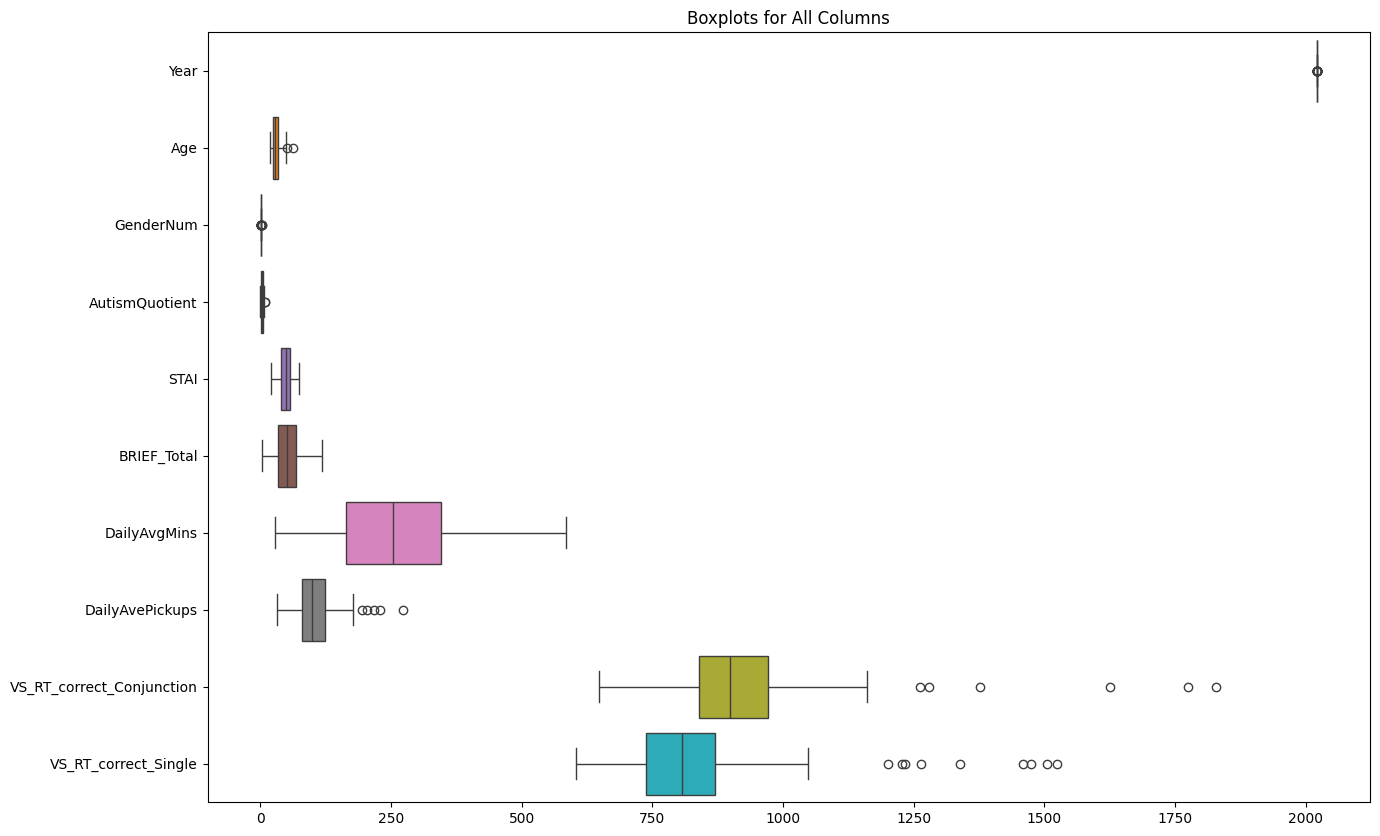

In [10]:
import matplotlib.pyplot as  plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')  # 'orient' set to 'h' for horizontal boxplots
plt.title('Boxplots for All Columns')
plt.show()

#### 1.7 The final data shape

In [11]:
df.shape

(124, 10)

## 2. Data Distribution

### 2.a. Pickup Counts by Gender

In [12]:
# Frequency table for Pickup counts split by gender
pickup_gender_freq = df.groupby('GenderNum')['DailyAvePickups'].count()
pickup_gender_freq

GenderNum
1     21
2    101
3      2
Name: DailyAvePickups, dtype: int64

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_40020\2474762920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_gender_freq.index, y=pickup_gender_freq.values, palette='viridis')


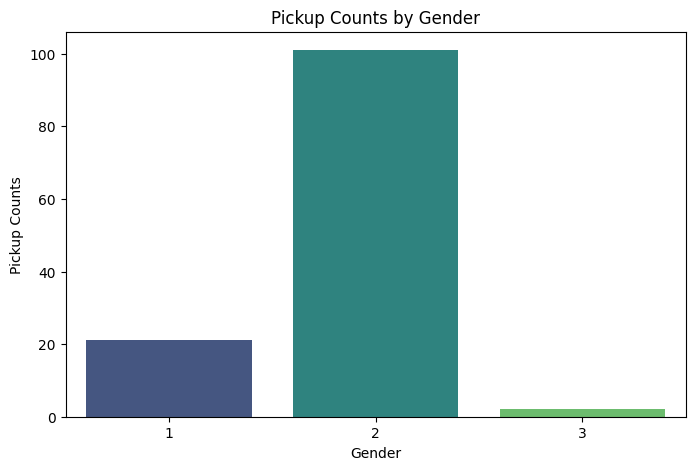

In [13]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=pickup_gender_freq.index, y=pickup_gender_freq.values, palette='viridis')
plt.title('Pickup Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Pickup Counts')
plt.show()

### 2.b. Distribution of Daily Average Minutes

#### 2.b.1 Frequency table

In [14]:
# Frequency table for Daily average minutes
daily_avg_minutes_dist = df['DailyAvgMins']
daily_avg_minutes_freq = daily_avg_minutes_dist.value_counts()
daily_avg_minutes_freq

DailyAvgMins
261    2
203    2
310    2
95     2
280    2
      ..
313    1
214    1
323    1
127    1
99     1
Name: count, Length: 109, dtype: int64

#### 2.b.2 Histplot

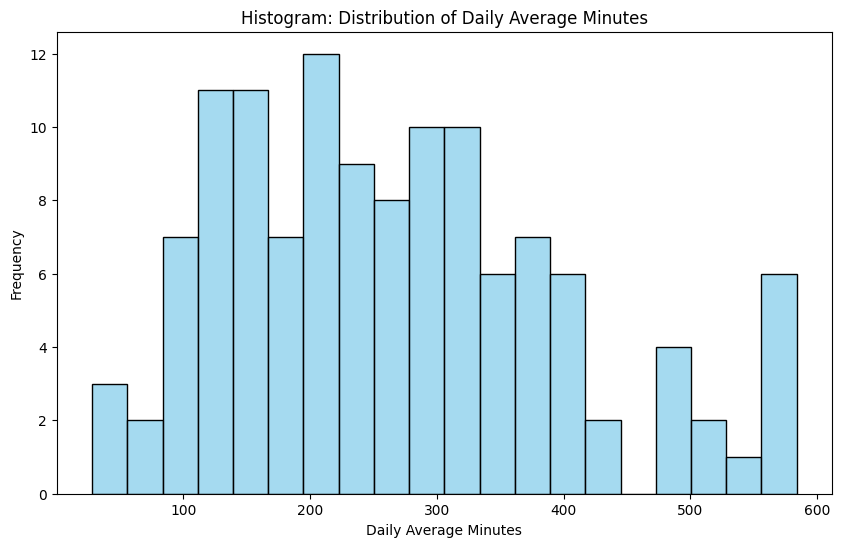

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_avg_minutes_dist, bins=20, kde=False, color='skyblue')
plt.title('Histogram: Distribution of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Frequency')
plt.show()

#### 2.b.3 KDEplot

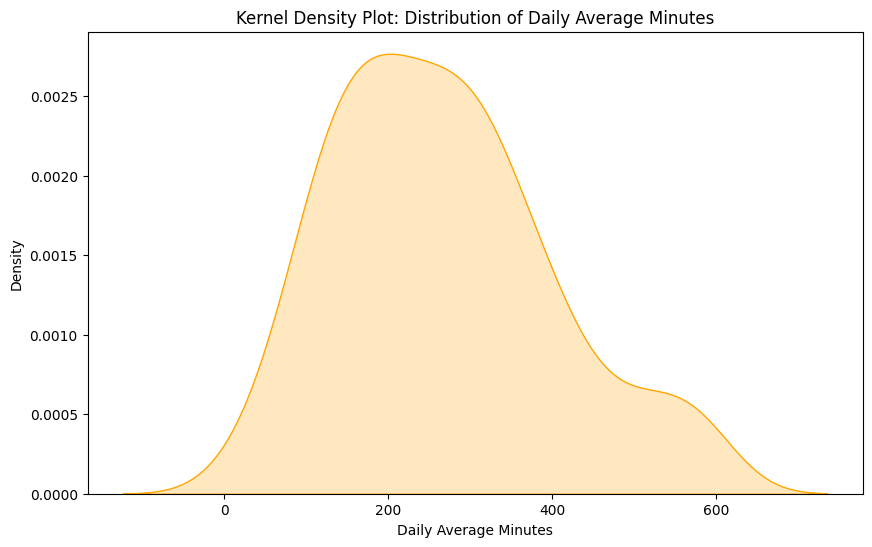

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='DailyAvgMins', color='orange', fill=True)
plt.title('Kernel Density Plot: Distribution of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Density')
plt.show()

### 2.c.1 Relationship between Age and Response time on singleton visual search 

#### 2.c.1.1 Scatterplot

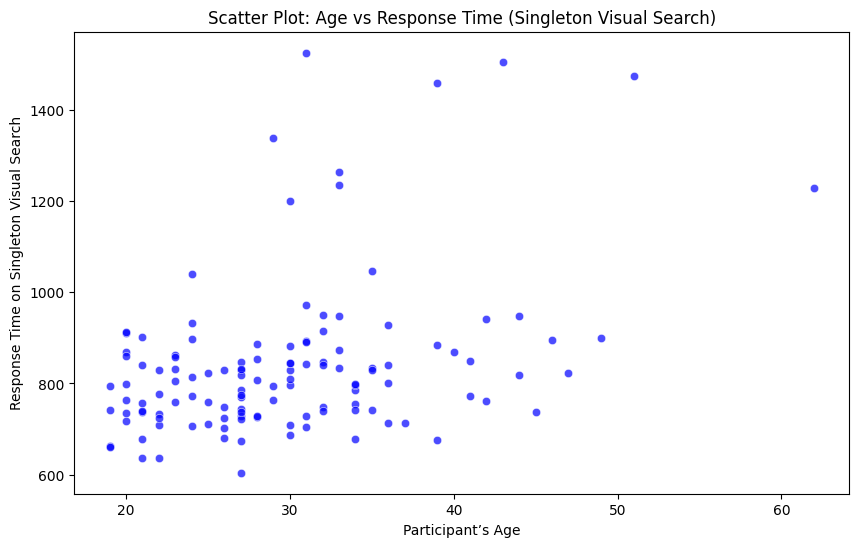

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='VS_RT_correct_Single', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot: Age vs Response Time (Singleton Visual Search)')
plt.xlabel('Participant’s Age')
plt.ylabel('Response Time on Singleton Visual Search')
plt.show()

#### 2.c.1.2 Regressionplot

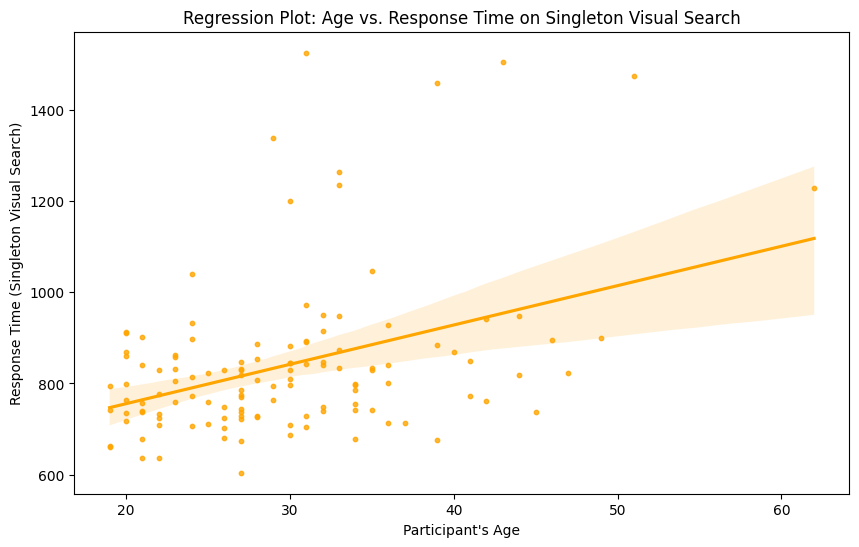

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='VS_RT_correct_Single', data=df, scatter_kws={'s': 10}, color='orange')
plt.title('Regression Plot: Age vs. Response Time on Singleton Visual Search')
plt.xlabel("Participant's Age")
plt.ylabel('Response Time (Singleton Visual Search)')
plt.show()

### 2.c.2 Relationship between gender and Response time on conjunction visual search

#### 2.c.2.1 Violinplot

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_40020\2772376321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Set2')


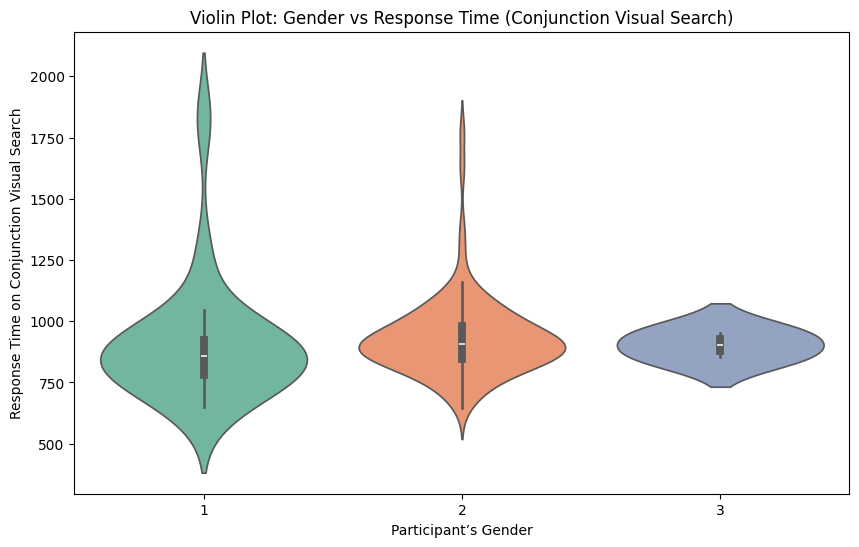

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Set2')
plt.title('Violin Plot: Gender vs Response Time (Conjunction Visual Search)')
plt.xlabel('Participant’s Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.show()

#### 2.c.2.2 Boxplot

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_40020\844324453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Pastel1')


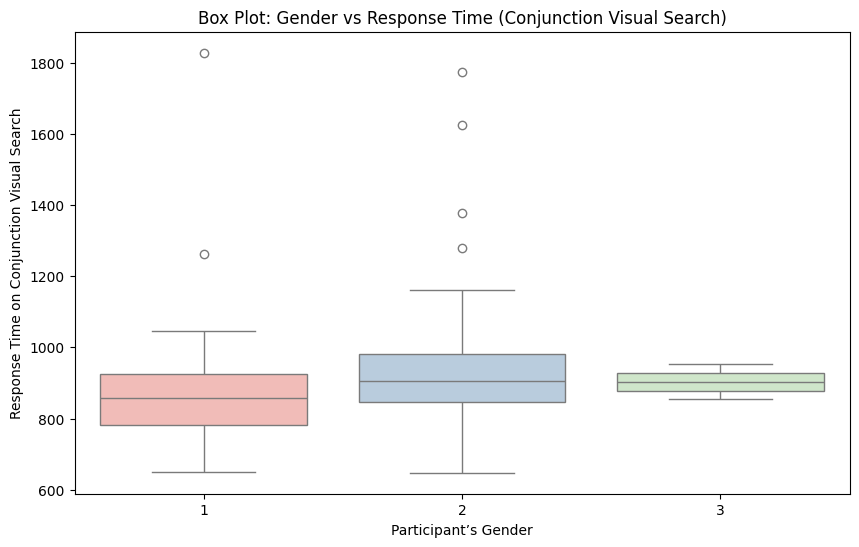

In [20]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Pastel1')
plt.title('Box Plot: Gender vs Response Time (Conjunction Visual Search)')
plt.xlabel('Participant’s Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.show()

## 3. Correlation  Check
Produce  a  bivariate  correlation  table  between  Age,  STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single.

In [21]:
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333
8,2021,33,2,2,51,24,475,112,1278.250000,1263.913333
9,2021,27,1,3,32,4,155,97,650.187500,604.390000
12,2021,19,2,4,53,81,305,120,741.265000,662.885417
13,2021,20,2,2,36,47,210,105,970.483333,869.622500
...,...,...,...,...,...,...,...,...,...,...
471,2021,31,1,3,39,23,104,69,924.016667,889.833333
473,2022,41,2,1,40,41,415,123,1043.103333,848.630556
477,2022,30,2,3,46,55,215,154,851.308333,708.291667
482,2022,20,2,1,45,16,568,127,1014.891667,913.600000


In [22]:
# Select columns for correlation
columns_for_correlation = ['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']

In [23]:
df[columns_for_correlation].dtypes

Age                       int32
STAI                      int32
BRIEF_Total               int32
DailyAvgMins              int32
VS_RT_correct_Single    float64
dtype: object

In [24]:
# Calculate the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

correlation_matrix

,Age,STAI,BRIEF_Total,DailyAvgMins,VS_RT_correct_Single
Age,1.000000,-0.159709,-0.147331,-0.181013,0.393644
STAI,-0.159709,1.000000,0.693311,0.058931,-0.239404
BRIEF_Total,-0.147331,0.693311,1.000000,0.103646,-0.175548
DailyAvgMins,-0.181013,0.058931,0.103646,1.000000,-0.097214
VS_RT_correct_Single,0.393644,-0.239404,-0.175548,-0.097214,1.000000


## 4. Linear  Regression
Perform  a  linear  regression  to  see  if  DailyAvgMins  predicts VS_RT_correct_Single

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
# Selecting relevant columns
X = df[['DailyAvgMins']]
y = df['VS_RT_correct_Single']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([842.17863795, 848.8853891 , 836.81323703, 859.3479209 ,
       859.75032597, 842.58104302, 851.16568449, 803.95015638,
       851.29981951, 851.97049463, 843.6541232 , 837.2156421 ,
       802.3405361 , 823.53386975, 830.77716099, 859.21378587,
       825.94830016, 854.65319509, 833.32572643, 853.58011491,
       859.75032597, 867.66429233, 845.3978785 , 864.98159186,
       853.44597988])

In [28]:
y_fit = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_fit)
mse_train

28816.684610666598

In [29]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 28148.114357187314


In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mae}")

Mean Squared Error: 109.53989498414809


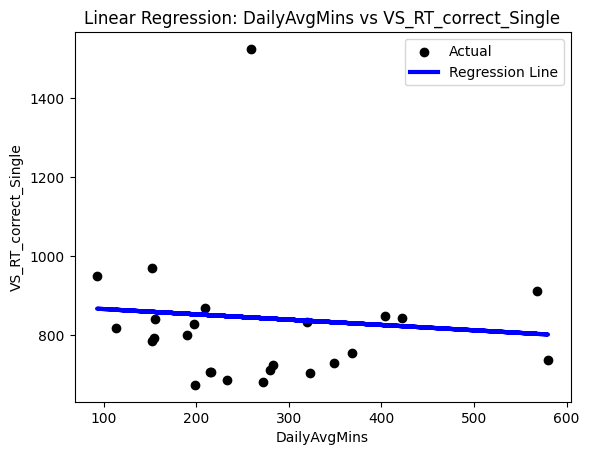

In [31]:
# Plotting the regression line
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('DailyAvgMins')
plt.ylabel('VS_RT_correct_Single')
plt.title('Linear Regression: DailyAvgMins vs VS_RT_correct_Single')
plt.legend()
plt.show()

In [32]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.094
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):              0.298
Time:                          19:46:04   Log-Likelihood:                -648.78
No. Observations:                    99   AIC:                             1302.
Df Residuals:                        97   BIC:                             1307.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          880.1388     38.253     23.008      0.000     804.217     956.061
DailyAvgMins    -0.1341      0.128     -1.046      0.298      -0.389       0.120
==============================================================================
Omnibus:                       57.848   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.808
Skew:                           2.156   Prob(JB):                     6.67e-39
Kurtosis:                       7.901   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **if DailyAvgMins predicts VS_RT_correct_Single?**
- The low R-squared and Adjusted R-squared values suggest that the model does not explain much of the variance in VS_RT_correct_Single. The p-value for DailyAvgMins is 0.298, indicating that it may not be a significant predictor in this model.

## 5. Multiple  Regression

In [33]:
X_multi = df[['DailyAvgMins', 'Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']]
y_multi = df['VS_RT_correct_Single']

# Splitting the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [34]:
# Creating a multiple regression model
model_multi = LinearRegression()

# Fitting the model to the training data
model_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [35]:
# Making predictions on the test set
y_pred_multi = model_multi.predict(X_test_multi)
y_pred_multi

array([758.71823223, 785.11362351, 877.74106346, 809.94190832,
       819.30638287, 878.05151348, 792.20684591, 742.95512925,
       828.08879582, 808.22250966, 862.25313563, 850.60073455,
       816.3217249 , 889.40838693, 943.78454932, 839.60672191,
       855.46980029, 903.83413236, 847.84820613, 885.10338081,
       833.78126128, 859.9144967 , 892.87566444, 836.53050622,
       806.99912498])

In [36]:
# Evaluating the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
print(f"Mean Squared Error (Multiple Regression): {mse_multi}")

# Compare the performance of the multiple regression model to the previous model
print(f"Mean Squared Error (Single Regression): {mse}")

Mean Squared Error (Multiple Regression): 27108.043796923972
Mean Squared Error (Single Regression): 28148.114357187314


In [37]:
# Check the coefficients and intercept of the model
coefficients = model_multi.coef_
intercept = model_multi.intercept_
coefficients

array([ 5.38281771e-03,  7.55566529e+00,  5.94382281e+00, -3.49170445e+00,
        7.64059096e-01, -5.49238961e-01])

In [38]:
#For comparsion use
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.011
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.094
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):              0.298
Time:                          19:46:04   Log-Likelihood:                -648.78
No. Observations:                    99   AIC:                             1302.
Df Residuals:                        97   BIC:                             1307.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          880.1388     38.253     23.008      0.000     804.217     956.061
DailyAvgMins    -0.1341      0.128     -1.046      0.298      -0.389       0.120
==============================================================================
Omnibus:                       57.848   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.808
Skew:                           2.156   Prob(JB):                     6.67e-39
Kurtosis:                       7.901   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Assuming X_train_multi and y_train_multi are your training data
# Add a constant to the predictor matrix (required for statsmodels)
X_train_multi = sm.add_constant(X_train_multi)

# Fit the multiple regression model using statsmodels
model_multi_sm = sm.OLS(y_train_multi, X_train_multi).fit()

# Display the summary of the model
model_multi_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.247
Model:                              OLS   Adj. R-squared:                  0.198
Method:                   Least Squares   F-statistic:                     5.036
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):           0.000166
Time:                          19:46:04   Log-Likelihood:                -635.27
No. Observations:                    99   AIC:                             1285.
Df Residuals:                        92   BIC:                             1303.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             791.5518    136.318      5.807      0.000     520.812    1062.292
DailyAvgMins        0.0054      0.123      0.044      0.965      -0.238       0.249
Age                 7.5557      2.011      3.757      0.000       3.562      11.550
GenderNum           5.9438     40.678      0.146      0.884     -74.845      86.733
STAI               -3.4917      1.880     -1.857      0.066      -7.226       0.243
BRIEF_Total         0.7641      0.883      0.865      0.389      -0.990       2.518
DailyAvePickups    -0.5492      0.415     -1.324      0.189      -1.373       0.274
==============================================================================
Omnibus:                       41.369   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.913
Skew:                           1.632   Prob(JB):                     2.99e-20
Kurtosis:                       6.337   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Compare the two sheet,we can find that:**
- R-squared increases from 0.011 to 0.247, indicating a better fit and further validating that the amount of variance accounted for in the outcome increase.
- The estimated coefficient for DailyAvgMins is 0.0054,which is very close to zero (0.0054), suggesting a very small impact.
- The p-value associated for DailyAvgMins is 0.965. And a high p-value suggests that DailyAvgMins is not statistically significant. 